# 0. Load and Inspect Data

In [1]:
import pandas as pd

columns = [
'class','cap-shape','cap-surface','cap-color','bruises','odor',
'gill-attachment','gill-spacing','gill-size','gill-color',
'stalk-shape','stalk-root','stalk-surface-above-ring',
'stalk-surface-below-ring','stalk-color-above-ring',
'stalk-color-below-ring','veil-type','veil-color',
'ring-number','ring-type','spore-print-color',
'population','habitat'
]

df = pd.read_csv("/kaggle/input/datasets/saifewu/mushroom/agaricus-lepiota.data",
                 header=None,
                 names=columns)

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# 1. Exploratory Data Analysis

**Basic Checks**

In [2]:
df.info()
df.isnull().sum()
df['class'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

class
e    4208
p    3916
Name: count, dtype: int64

**Class Distribution Visualization**

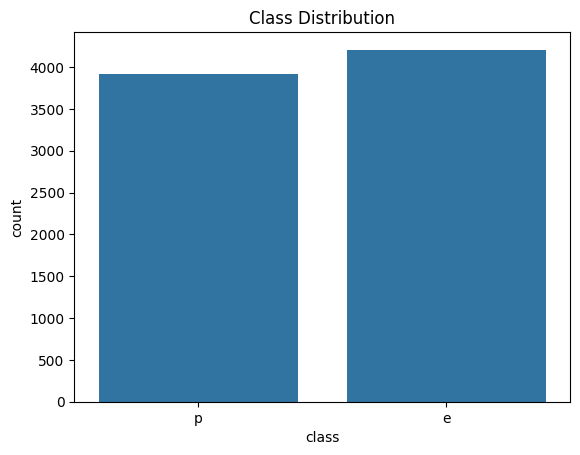

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='class', data=df)
plt.title("Class Distribution")
plt.show()

**Feature Importance Insight**

In [4]:
pd.crosstab(df['odor'], df['class'])

class,e,p
odor,,
a,400,0
c,0,192
f,0,2160
l,400,0
m,0,36
n,3408,120
p,0,256
s,0,576
y,0,576


# 2. Data Preprocessing

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])

X = df.drop('class', axis=1)
y = df['class']

# 3. Train-Test Split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Decision Tree Model

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 1.0


# 5. Random Forest Evaluation

In [8]:
from sklearn.ensemble import RandomForestClassifier

n_values = [1, 50, 100, 150, 200, 250]
rf_results = {}

for n in n_values:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    rf_results[n] = acc
    print(f"n_estimators={n}, Accuracy={acc}")

n_estimators=1, Accuracy=1.0
n_estimators=50, Accuracy=1.0
n_estimators=100, Accuracy=1.0
n_estimators=150, Accuracy=1.0
n_estimators=200, Accuracy=1.0
n_estimators=250, Accuracy=1.0


**Visual Comparison of Random Forest Performance**

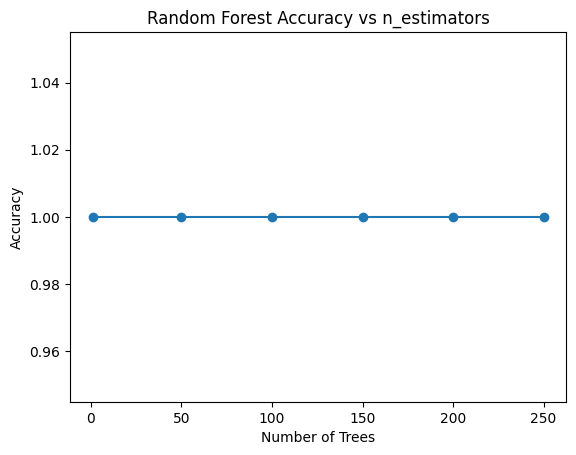

In [9]:
plt.plot(list(rf_results.keys()), list(rf_results.values()), marker='o')
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs n_estimators")
plt.show()

# Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix, classification_report

print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Confusion Matrix:
[[843   0]
 [  0 782]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



# Feature Importance

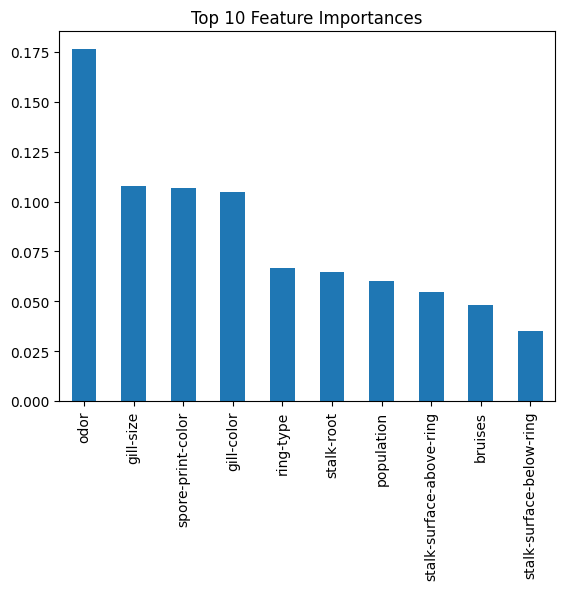

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

rf_best = RandomForestClassifier(n_estimators=100, random_state=42)
rf_best.fit(X_train, y_train)

importances = pd.Series(rf_best.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances")
plt.show()

# 6. Final Model Comparison

In [12]:
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest (Best) Accuracy:", max(rf_results.values()))

Decision Tree Accuracy: 1.0
Random Forest (Best) Accuracy: 1.0


# Conclusion

The mushroom dataset is highly separable, particularly due to the odor feature. Both Decision Tree and Random Forest achieved 100% accuracy. Increasing the number of trees did not improve performance, indicating that even a small ensemble is sufficient. Random Forest is preferred due to better generalization and reduced variance.